In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import pickle
import functions as f
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error 


In [ ]:
# import 10 fold validation with 160 predictors

#regression160 = pd.read_pickle('linearRegression160.pkl')
#regressionScores160 = pd.read_pickle('linearRegressionScores160.pkl')

#mean_coefficients160 = regression160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
#std_coefficients160 = regression160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

In [2]:
# import 10 fold validation with 8 transcription factors

linearCoefs8 = pd.read_pickle('linearCoefs8.pkl')
linearScores8 = pd.read_pickle('linearScores8.pkl')

mean_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
std_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

In [63]:
linearCoefs8

,predictors,coefficients,target
0,Klf2,0.105080,Hsd17b12
1,Mcm3,0.510115,Hsd17b12
2,Mcm5,-0.257477,Hsd17b12
3,Hmgb2,-0.139979,Hsd17b12
4,Cdk4,0.113977,Hsd17b12
...,...,...,...
3,Hmgb2,0.044693,Ankrd12
4,Cdk4,-0.079658,Ankrd12
5,Hif1a,-0.115752,Ankrd12
6,Mcm6,0.452992,Ankrd12


In [ ]:
# import 10 fold validation ridge regression with 8 tf

#ridge8 = pd.read_pickle('ridgeRegression8.pkl')
#ridgeScores8 = pd.read_pickle('ridgeRegressionScores8.pkl')

#ridge_mean_coefficients8 = ridge8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
#ridge_std_coefficients8 = ridge8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

#ridge_residuals = pd.read_pickle('ridgeResiduals8.pkl')

In [64]:
# import 10 fold validation lasso regression with 8 tf

lassoCoefs8 = pd.read_pickle('lasso_000013Coefs8.pkl')
lassoScores8 = pd.read_pickle('lasso_000013Scores8.pkl')

lasso_mean_coefficients8 = lassoCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
lasso_std_coefficients8 = lassoCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

I started off looking at the data using 8 predictors. The following shows the clustermap of the mean coefficients accross the data from the 10 fold cross validation. 

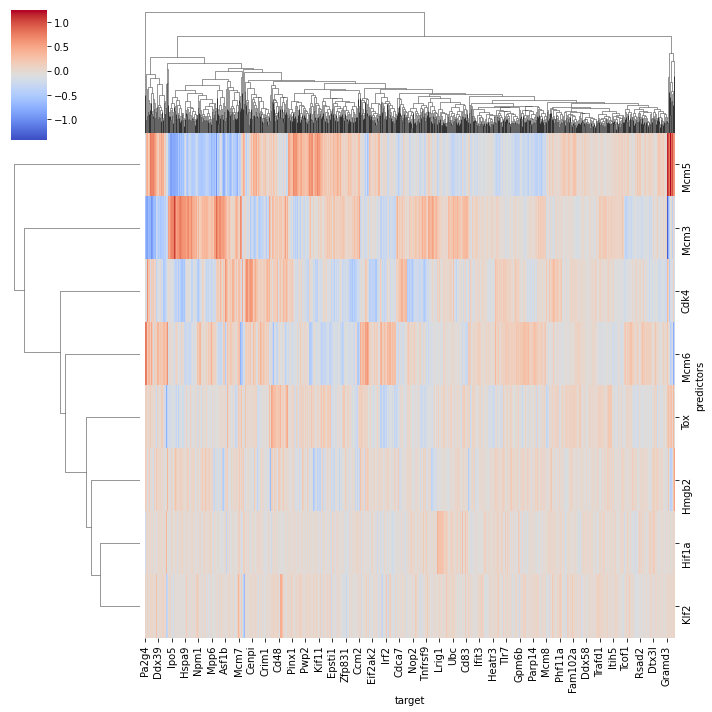

In [65]:
l = sns.clustermap(mean_coefficients8, cmap='coolwarm')

There are some patterns, so the model is not just random. The branch all the way to the right seems to be positively correlated by Mcm5 and negatively correlated by Mcm6. Also noteworthy is the dark area of inner branch in the top right. 

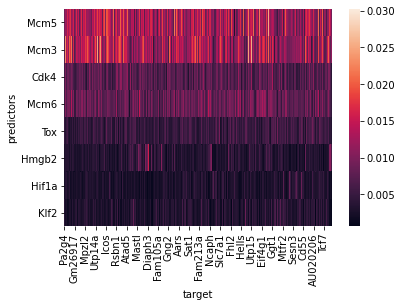

In [66]:
reordered = f.reorder_like_clustermap(std_coefficients8, l)
h = sns.heatmap(reordered)

In [ ]:
# ridge regression
r = sns.clustermap(ridge_mean_coefficients8, cmap='coolwarm')

In [ ]:
reordered = f.reorder_like_clustermap(ridge_std_coefficients8, r)
sns.heatmap(reordered)

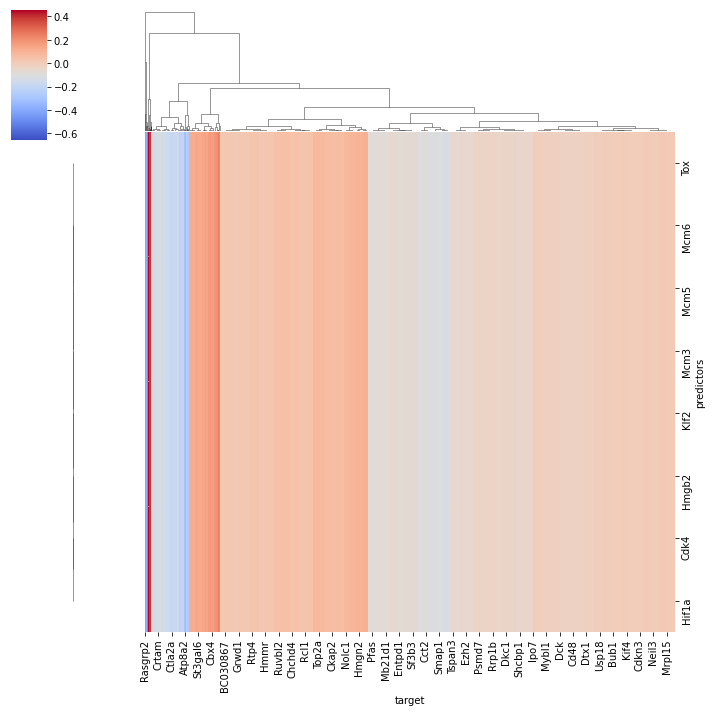

In [67]:
# lasso regression
s = sns.clustermap(lasso_mean_coefficients8, cmap='coolwarm')

I feel like something wierd might be going on here, why are the values for all the coefficients of the genes the same? 

In [78]:
lassoCoefs8

,predictors,coefficients,target
0,Klf2,0.105080,Hsd17b12
1,Mcm3,0.510115,Hsd17b12
2,Mcm5,-0.257477,Hsd17b12
3,Hmgb2,-0.139979,Hsd17b12
4,Cdk4,0.113977,Hsd17b12
...,...,...,...
3,Hmgb2,0.044693,Ankrd12
4,Cdk4,-0.079658,Ankrd12
5,Hif1a,-0.115752,Ankrd12
6,Mcm6,0.452992,Ankrd12


<AxesSubplot:xlabel='target', ylabel='predictors'>

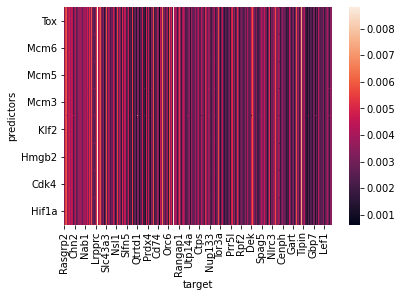

In [68]:
reo = f.reorder_like_clustermap(lasso_std_coefficients8, s)
sns.heatmap(reo)

Looking at the clustermap of all 160 predictive genes and 10 fold cross validation, it is very hard to see patterns. I believe that the predictive genes at the top show a little bit more structure but it is difficult to make any conclusions. 

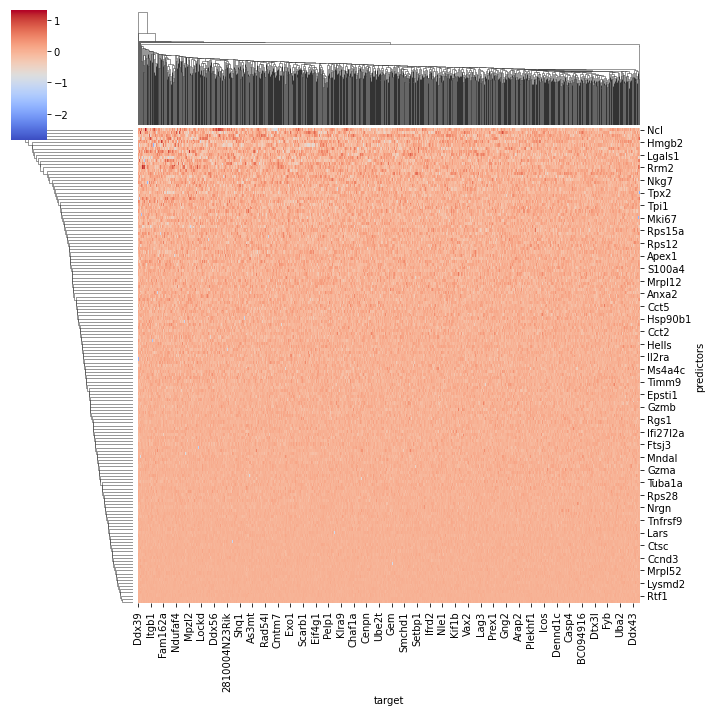

In [69]:
s = sns.clustermap(mean_coefficients160, cmap='coolwarm')

I am not sure what to make of the standard deviations. The values are incredibly high in total ? 

In [ ]:
sns.clustermap(std_coefficients160, cmap='coolwarm')

Lets take a look at the heatmaps of proportions (sum residuals/sum absolute response values)

-> if model fits data well -> residuals closer to 0 but sum absolute response values higher -> lower score
-> if model does not fit data well -> high residuals (model can be arbitrairily bad) -> higher score

--> the lower the score the better the model fits the data

## maybe order these the same way as the clustermaps..

# Mean / SD (large coefficients and small SD)
#### In the following we take a look at large coefficients (large mean) that also have a smaller standard deviation. 
-> if values are large: large mean comined with small standard deviation
-> if values are small: either small mean with large stanard deviation or larger mean with very large standard deviation

!!!plot again on absolute -> dont have to look at two tails
compare to confidence of velocity gene predictions 

<AxesSubplot:xlabel='coefficients', ylabel='Count'>

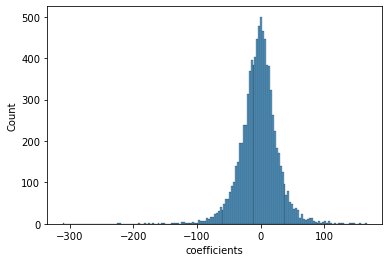

In [3]:
mean = linearCoefs8.groupby(['target', 'predictors']).coefficients.mean()
std = linearCoefs8.groupby(['target', 'predictors']).coefficients.std()
sns.histplot(mean/std)

In [4]:
msl = mean/std

In [81]:
msl.nlargest()

target  predictors
Cbx5    Mcm6          166.989959
Rps2    Tox           157.222059
Malat1  Mcm6          147.863316
Fxyd5   Hmgb2         144.064084
Tox     Hif1a         142.894442
Ifngr1  Tox           139.703294
Fxyd5   Mcm6          128.899630
Hp1bp3  Cdk4          124.827550
Mcm4    Cdk4          121.783330
Il23r   Hif1a         116.446683
Name: coefficients, dtype: float64

In [82]:
msl.nsmallest(10)

target    predictors
Rasgrp2   Klf2         -311.134121
Lsp1      Mcm6         -225.610460
Rrm1      Hmgb2        -222.492831
Anp32e    Hmgb2        -190.146417
Tk1       Hmgb2        -190.130146
Ptma      Hmgb2        -181.219832
Hsp90ab1  Hif1a        -176.265944
Tox       Klf2         -170.235605
          Tox          -159.187696
S100a6    Klf2         -154.453353
Name: coefficients, dtype: float64

# Ratio of residuals and true values
### Taking mean(log(abs(y-y_pred)/abs(y)))

if negative: y-y_pred is smaller than y, ratio is more negative the closer the prediciton to true value

if 0: y-y_pred == y -> y_pred is 0

if positive: y-y_pred > y -> residual is larger than real value, bad. 

if -inf: y-y_pred = 0 -> perfect prediction. 

## Ridge regression

<AxesSubplot:>

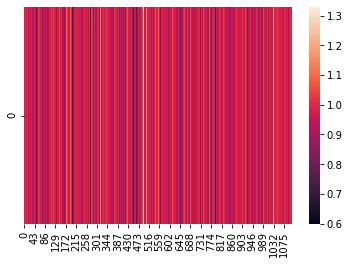

In [41]:
# residuals ridge
sns.heatmap(np.matrix(ridgeScores8.groupby('target').test_proportion.mean().tolist()))

This is the mean: 0.95653684592333


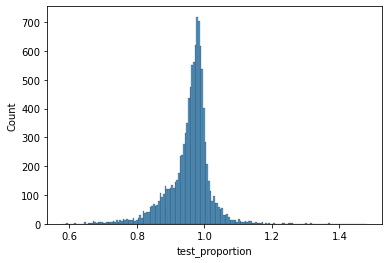

In [42]:
sns.histplot(ridgeScores8['test_proportion'])
print('This is the mean:',np.mean(ridgeScores8['test_proportion']))

In [ ]:
mean = linearCoefs8.groupby(['target', 'predictors']).coefficients.mean()
std = linearCoefs8.groupby(['target', 'predictors']).coefficients.std()
sns.histplot(mean/std)

In [ ]:
ms = mean/std


In [ ]:
ms.nlargest(10)

In [ ]:
ms.nsmallest(10)

In [52]:
ridgeScores8.sort_values("test_proportion")[:10]

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion,target
9,Ridge(),0.627312,0.608711,-0.378421,-0.390550,0.579740,0.599100,Rasgrp2
7,Ridge(),0.609187,0.610776,-0.387985,-0.389499,0.588858,0.598153,Rasgrp2
6,Ridge(),0.625281,0.608800,-0.401087,-0.388102,0.589777,0.597743,Rasgrp2
3,Ridge(),0.612265,0.610411,-0.403482,-0.387792,0.589777,0.597635,Rasgrp2
4,Ridge(),0.612139,0.610435,-0.373032,-0.391174,0.593465,0.597569,Rasgrp2
1,Ridge(),0.615683,0.610060,-0.385809,-0.389740,0.593573,0.597852,Rasgrp2
2,Ridge(),0.610881,0.610608,-0.390526,-0.389202,0.598641,0.596958,Rasgrp2
5,Ridge(),0.593179,0.612540,-0.411996,-0.386820,0.607374,0.596243,Rasgrp2
0,Ridge(),0.606362,0.611039,-0.364463,-0.392123,0.616586,0.595532,Rasgrp2
8,Ridge(),0.585311,0.613340,-0.401914,-0.387951,0.619226,0.594930,Rasgrp2


## Linear Regression 

<AxesSubplot:>

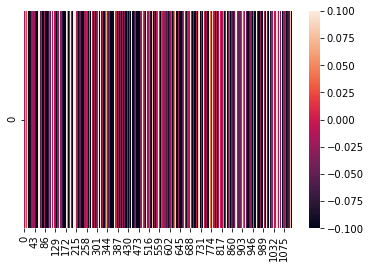

In [83]:
# residuals linear
sns.heatmap(np.matrix(linearScores8.groupby('target').test_proportion.mean().tolist()))

In [89]:
linearScores8.groupby('target').test_proportion.min()

target
1110004E09Rik    0.008739
1500009L16Rik   -0.122339
1600014C10Rik   -0.014039
1700017B05Rik   -0.058989
1700019D03Rik   -0.261897
                   ...   
Zeb2             0.026859
Zfp36l1         -0.035326
Zfp831          -0.697183
Zranb3          -0.321567
Zwilch          -0.204282
Name: test_proportion, Length: 1109, dtype: float64

In [104]:
linearLimitedScores8=linearScores8.replace(to_replace=float('-inf'), value=-1.5)

This is the mean: -0.061281746956222675
This is the median: -0.04901283420622349


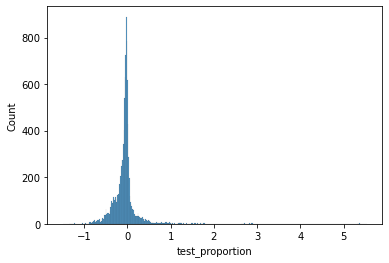

In [107]:
sns.histplot(linearLimitedScores8['test_proportion'])
print('This is the mean:',np.mean(linearLimitedScores8['test_proportion']))
print('This is the median:',np.median(linearLimitedScores8['test_proportion']))

In [111]:
linearLimitedScores8.sort_values(by='test_proportion')

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion,target
2,LinearRegression(),0.054085,0.077019,-0.814279,-0.937095,-1.500000,-0.437587,Itgb8
8,LinearRegression(),0.201004,0.164851,-0.732594,-0.842757,-1.322527,-1.252058,Lrr1
5,LinearRegression(),0.159970,0.169168,-0.904876,-0.823636,-1.319287,-1.289192,Lrr1
1,LinearRegression(),0.140349,0.171360,-0.909282,-0.823247,-1.299095,-1.284687,Lrr1
2,LinearRegression(),0.204771,0.163858,-0.811591,-0.834049,-1.278404,-1.285287,Lrr1
...,...,...,...,...,...,...,...,...
6,LinearRegression(),0.059239,0.046605,-0.893211,-0.958667,5.361015,5.380674,Atp1b1
9,LinearRegression(),0.058624,0.046552,-0.926057,-0.955077,5.401692,5.374567,Atp1b1
0,LinearRegression(),0.048611,0.047533,-1.130607,-0.932357,5.461558,5.362782,Atp1b1
5,LinearRegression(),0.046712,0.047879,-1.217414,-0.922728,5.491284,5.364778,Atp1b1


One value with -inf. The next smallest value is at -1.2.
At least the mean is below 0, jsut barely..

## Lasso alpha = 0.000013
This does not work since I have not been able to generate the data. The kernel keeps getting killed. 

<AxesSubplot:>

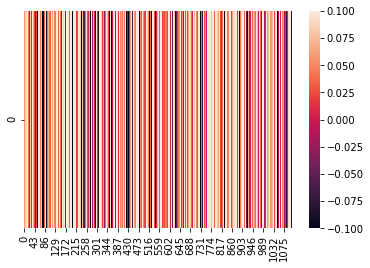

In [108]:
# residuals ridge
sns.heatmap(np.matrix(lassoScores8.groupby('target').test_proportion.mean().tolist()))

In [116]:
lassoLimitedScores8=lassoScores8.replace(to_replace=float('-inf'), value=-1.5)

This is the mean: 0.08091878241452197
This is the median: 0.05693427473306656


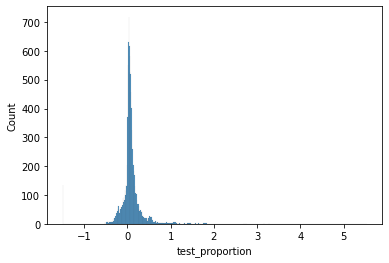

In [117]:
sns.histplot(lassoLimitedScores8['test_proportion'])
print('This is the mean:',np.mean(lassoLimitedScores8['test_proportion']))
print('This is the median:',np.median(lassoLimitedScores8['test_proportion']))

# Residuals

In [132]:
# Load dataset with velocity values
vdata = sc.read_h5ad("velocity_adata.h5ad")

In [133]:
# Scale Ms and velocity layer with zero mean and unit variance 
    # sc.pp.scale adds most recent mean and std as variables to var

sc.pp.scale(vdata, layer='Ms')
sc.pp.scale(vdata, layer='velocity')

In [134]:
# Velocity genes
# No Ccl5 included..

velocity_genes = vdata.var.index[vdata.var['velocity_genes'] == True].tolist()

transcription8 = ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6', 'Tox']

X = vdata[:, transcription8].layers['Ms']

In [125]:
# genes with smaller proportion

genes = linearLimitedScores8[linearLimitedScores8['test_proportion']<-0.8]['target'].drop_duplicates().tolist()

In [126]:
genes

['Adarb1',
 'Pask',
 'Stil',
 'Cdc20b',
 'Lrr1',
 'Map1b',
 'Kntc1',
 'Itgb8',
 'Rad51ap1',
 'Mtfr2',
 'Spire1',
 'Polq',
 'Cenpi']